<a href="https://colab.research.google.com/github/joshua-jy-yu/DS-2002/blob/main/superhero_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Superhero Database Assignment (SQLite & Google Colab)

## Objective
In this assignment, you will design and implement a **Superhero Database** using SQLite in Google Colab. This database will store superheroes, villains, and their battles. You will write SQL queries to analyze battle outcomes and relationships between heroes and villains.

### Group Size:
- 2 to 3 students per group.

### Tools Required:
- **Google Colab**
- **SQLite (built into Python)**
- **CSV files (provided for import)**

## Step 1: Setting Up Your SQLite Database

### Tasks:
1. Initialize SQLite in Google Colab.
2. Create a database named `superhero_db.sqlite`.
3. Define the database schema, ensuring it includes the following tables:
   - `heroes`: Stores superhero names, powers, and teams.
   - `villains`: Stores villains and their evil plans.
   - `battles`: Tracks battles between heroes and villains, including the outcome.
4. Implement primary keys and foreign keys where appropriate.

✅ **Checkpoint:** Ensure that the database and tables have been successfully created.

In [3]:
import sqlite3
connection = sqlite3.connect('superhero_db.sqlite')
cursor = connection.cursor()

cursor.execute('''
CREATE TABLE IF NOT EXISTS heroes (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT NOT NULL,
    power TEXT,
    team TEXT
)
  ''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS villains (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT NOT NULL,
    evil_plan TEXT
)
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS battles (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    hero_id INTEGER,
    villain_id INTEGER,
    outcome TEXT,
    FOREIGN KEY (hero_id) REFERENCES heroes(id),
    FOREIGN KEY (villain_id) REFERENCES villains(id)
)
''')
connection.commit()

print("Database created and connected!")

Database created and connected!


## Step 2: Import Data from CSV Files

### Tasks:
1. Download the provided CSV files.
2. Upload them to Google Colab.
3. Write a script to import data from these files into the appropriate tables.
4. Verify that the data has been successfully inserted.

✅ **Checkpoint:** Ensure that each table contains the expected data from the CSV files.

In [4]:
cursor.execute("DELETE FROM heroes")
cursor.execute("DELETE FROM villains")
cursor.execute("DELETE FROM battles")
connection.commit()

print("All data in the hero, villain, and battle tables has been deleted.")

All data in the hero, villain, and battle tables has been deleted.


In [5]:
import pandas as pd

df_heroes = pd.read_csv('heroes.csv')
df_villains = pd.read_csv('villains.csv')
df_battles = pd.read_csv('battles.csv')

df_heroes.head()

,id,name,power,team
0,1,Spider-Man,Web-slinging,Avengers
1,2,Iron Man,Powered Armor,Avengers
2,3,Batman,Genius Detective,Justice League
3,4,Superman,Super Strength,Justice League
4,5,Thor,God of Thunder,Avengers


In [6]:
df_villains.head()

,id,name,evil_plan
0,1,Green Goblin,Terrorize New York
1,2,Thanos,Collect all Infinity Stones
2,3,Joker,Spread chaos in Gotham
3,4,Lex Luthor,Defeat Superman
4,5,Loki,Trick humanity into worshiping him


In [7]:
df_battles.head()

,id,hero_id,villain_id,outcome
0,1,1,10,Villain Wins
1,2,9,3,Hero Wins
2,3,8,1,Draw
3,4,5,4,Villain Wins
4,5,1,7,Hero Wins


In [8]:
df_heroes.to_sql('heroes', connection, if_exists='replace', index=False)
df_villains.to_sql('villains', connection, if_exists='replace', index=False)
df_battles.to_sql('battles', connection, if_exists='replace', index=False)

print("All hero, villain, and battle csv data has been inserted into the tables.")

All hero, villain, and battle csv data has been inserted into the tables.


In [9]:
# Shows that hero data has been inserted.
cursor.execute("SELECT * FROM heroes")
rows = cursor.fetchall()

print("All hero data:")
for row in rows:
    print(row)

All hero data:
(1, 'Spider-Man', 'Web-slinging', 'Avengers')
(2, 'Iron Man', 'Powered Armor', 'Avengers')
(3, 'Batman', 'Genius Detective', 'Justice League')
(4, 'Superman', 'Super Strength', 'Justice League')
(5, 'Thor', 'God of Thunder', 'Avengers')
(6, 'Wonder Woman', 'Amazonian Strength', 'Justice League')
(7, 'Black Panther', 'Enhanced Agility', 'Avengers')
(8, 'The Flash', 'Super Speed', 'Justice League')
(9, 'Hulk', 'Super Strength', 'Avengers')
(10, 'Doctor Strange', 'Mystic Arts', 'Avengers')


In [10]:
# Shows that villain data has been inserted.
cursor.execute("SELECT * FROM villains")
rows = cursor.fetchall()

print("All villain data:")
for row in rows:
    print(row)

All villain data:
(1, 'Green Goblin', 'Terrorize New York')
(2, 'Thanos', 'Collect all Infinity Stones')
(3, 'Joker', 'Spread chaos in Gotham')
(4, 'Lex Luthor', 'Defeat Superman')
(5, 'Loki', 'Trick humanity into worshiping him')
(6, 'Ultron', 'AI world domination')
(7, 'Darkseid', 'Control the universe')
(8, 'Venom', 'Consume Spider-Man')
(9, 'Magneto', 'Mutant supremacy')
(10, 'Red Skull', 'Revive Hydra')


In [11]:
# Shows that battle data has been inserted.
cursor.execute("SELECT * FROM battles")
rows = cursor.fetchall()

print("All battle data:")
for row in rows:
    print(row)

All battle data:
(1, 1, 10, 'Villain Wins')
(2, 9, 3, 'Hero Wins')
(3, 8, 1, 'Draw')
(4, 5, 4, 'Villain Wins')
(5, 1, 7, 'Hero Wins')
(6, 2, 8, 'Villain Wins')
(7, 9, 8, 'Hero Wins')
(8, 3, 2, 'Hero Wins')
(9, 7, 5, 'Hero Wins')
(10, 3, 1, 'Draw')
(11, 1, 8, 'Villain Wins')
(12, 2, 1, 'Draw')
(13, 8, 9, 'Hero Wins')
(14, 8, 1, 'Draw')
(15, 6, 10, 'Draw')
(16, 1, 1, 'Villain Wins')
(17, 8, 3, 'Draw')
(18, 6, 3, 'Villain Wins')
(19, 4, 8, 'Villain Wins')
(20, 3, 4, 'Hero Wins')
(21, 8, 1, 'Draw')
(22, 4, 9, 'Draw')
(23, 3, 9, 'Draw')
(24, 8, 9, 'Villain Wins')
(25, 2, 5, 'Draw')
(26, 3, 7, 'Draw')
(27, 10, 3, 'Draw')
(28, 3, 8, 'Draw')
(29, 3, 5, 'Hero Wins')
(30, 5, 5, 'Hero Wins')


## Step 3: Querying the Database

### Tasks:
Write SQL queries to answer the following:
1. Retrieve all superheroes and their powers.
2. Find all battles where the hero won.
3. List all villains and their evil plans.
4. Determine which superhero has fought the most battles.

✅ **Checkpoint:** Ensure that all queries return meaningful results from the database.

In [12]:
cursor.execute('''
SELECT name, power FROM heroes
''')
rows = cursor.fetchall()
print("#1: All Superheroes and their Powers")
for row in rows:
  print(f"{row[0]}: {row[1]}")

#1: All Superheroes and their Powers
Spider-Man: Web-slinging
Iron Man: Powered Armor
Batman: Genius Detective
Superman: Super Strength
Thor: God of Thunder
Wonder Woman: Amazonian Strength
Black Panther: Enhanced Agility
The Flash: Super Speed
Hulk: Super Strength
Doctor Strange: Mystic Arts


In [13]:
# Joined with hero and villain tables to make the ids more readable.
# Filtered the selection based on the battles where the hero wins.
cursor.execute('''
SELECT battles.id, heroes.name, villains.name, battles.outcome FROM battles
JOIN heroes ON battles.hero_id = heroes.id
JOIN villains ON battles.villain_id = villains.id
WHERE outcome = 'Hero Wins'
''')
rows = cursor.fetchall()
print("#2: All Battles Won by the Hero")
for row in rows:
  print(f"Battle {row[0]}: {row[1]} vs {row[2]}, {row[3]}")

#2: All Battles Won by the Hero
Battle 2: Hulk vs Joker, Hero Wins
Battle 5: Spider-Man vs Darkseid, Hero Wins
Battle 7: Hulk vs Venom, Hero Wins
Battle 8: Batman vs Thanos, Hero Wins
Battle 9: Black Panther vs Loki, Hero Wins
Battle 13: The Flash vs Magneto, Hero Wins
Battle 20: Batman vs Lex Luthor, Hero Wins
Battle 29: Batman vs Loki, Hero Wins
Battle 30: Thor vs Loki, Hero Wins


In [14]:
cursor.execute('''
SELECT name, evil_plan FROM villains
''')
rows = cursor.fetchall()
print("#3: All Villains and their Evil Plans")
for row in rows:
  print(f"{row[0]}: {row[1]}")

#3: All Villains and their Evil Plans
Green Goblin: Terrorize New York
Thanos: Collect all Infinity Stones
Joker: Spread chaos in Gotham
Lex Luthor: Defeat Superman
Loki: Trick humanity into worshiping him
Ultron: AI world domination
Darkseid: Control the universe
Venom: Consume Spider-Man
Magneto: Mutant supremacy
Red Skull: Revive Hydra


In [15]:
# Grouped rows by hero_id, and ordered by fought_count.
cursor.execute('''
SELECT heroes.name, COUNT(battles.hero_id) AS Fought_Count
From battles
JOIN heroes ON battles.hero_id = heroes.id
GROUP BY hero_id
ORDER BY Fought_Count DESC
''')
# Select the first - the highest one.
top_hero = cursor.fetchone()
print("#4: Hero with most battles fought")
print(f"{top_hero[0]}: {top_hero[1]} battles fought")

#4: Hero with most battles fought
Batman: 7 battles fought


Hero 3, who is Batman, had the most battles fought with 7.

## Step 4: Add a Custom Feature

### Tasks:
1. Design and implement an additional table related to superheroes or villains.
2. Populate it with data.
3. Write at least one query to retrieve meaningful insights from the new table.

**Examples of Custom Features:**
- Sidekicks for superheroes
- Villain hideouts
- Battle locations
- Superhero equipment

✅ **Checkpoint:** Ensure that the new table and queries function correctly.

In [16]:
cursor.execute('''
CREATE TABLE IF NOT EXISTS sidekicks (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    hero_id INTEGER,
    sidekick_name TEXT,
    FOREIGN KEY (hero_id) REFERENCES heroes(id)
)
''')
connection.commit()

In [72]:
# Chose to insert the data directly through the execute many.

cursor.execute("DELETE FROM sidekicks")

sidekicks = [(1, 'Miles Morales'),
(1, 'Spider-Woman'),
(2, 'War Machine'),
(3, 'Robin'),
(3, 'Nightwing'),
(3, 'Batgirl'),
(4, 'Superboy'),
(4, 'Krypto'),
(6, 'Donna Troy'),
(6, 'Cassie Sandsmark'),
(7, 'Shuri'),
(8, 'Kid Flash'),
(8, 'Impulse'),
(9, 'Rick Jones'),
(9, 'A-Bomb'),
(10, 'Wong'),
(1, 'Silk'),
(3, 'Red Hood'),
(6, 'Wonder Girl'),
(8, 'Jay Garrick'),
(9, 'She-Hulk'),
(10, 'Brother Voodoo'),
(10, 'Clea'),

]

cursor.executemany('''
INSERT INTO sidekicks (hero_id, sidekick_name) VALUES (?, ?)
''', sidekicks)

connection.commit()

In [73]:
cursor.execute('''
SELECT heroes.name, COUNT(sidekicks.hero_id) AS SidekickCount
From sidekicks
JOIN heroes ON sidekicks.hero_id = heroes.id
GROUP BY hero_id
ORDER BY SidekickCount DESC
''')

top_hero = cursor.fetchone()
print(f"Most sidekicks: {top_hero[0]} - {top_hero[1]} sidekicks")

Most sidekicks: Batman - 4 sidekicks


## Bonus Challenge (+5 Points)

### Tasks:
1. Enhance your project by adding a visual or interactive component.

**Options:**
- Visualize battles using Matplotlib (e.g., a bar chart showing how many battles each superhero has fought).
- Make it interactive (e.g., allow users to input a superhero name and display their battles).

✅ **Checkpoint:** If attempting the bonus, ensure that your visualization or interactive component works correctly.

In [74]:
# Query the sales data into a DataFrame
df = pd.read_sql_query('''
SELECT heroes.name, COUNT(battles.hero_id) AS Fought_Count
From battles
JOIN heroes ON battles.hero_id = heroes.id
GROUP BY hero_id
''', connection)

# Display the DataFrame
df.head(10)

,name,Fought_Count
0,Spider-Man,4
1,Iron Man,3
2,Batman,7
3,Superman,2
4,Thor,2
5,Wonder Woman,2
6,Black Panther,1
7,The Flash,6
8,Hulk,2
9,Doctor Strange,1


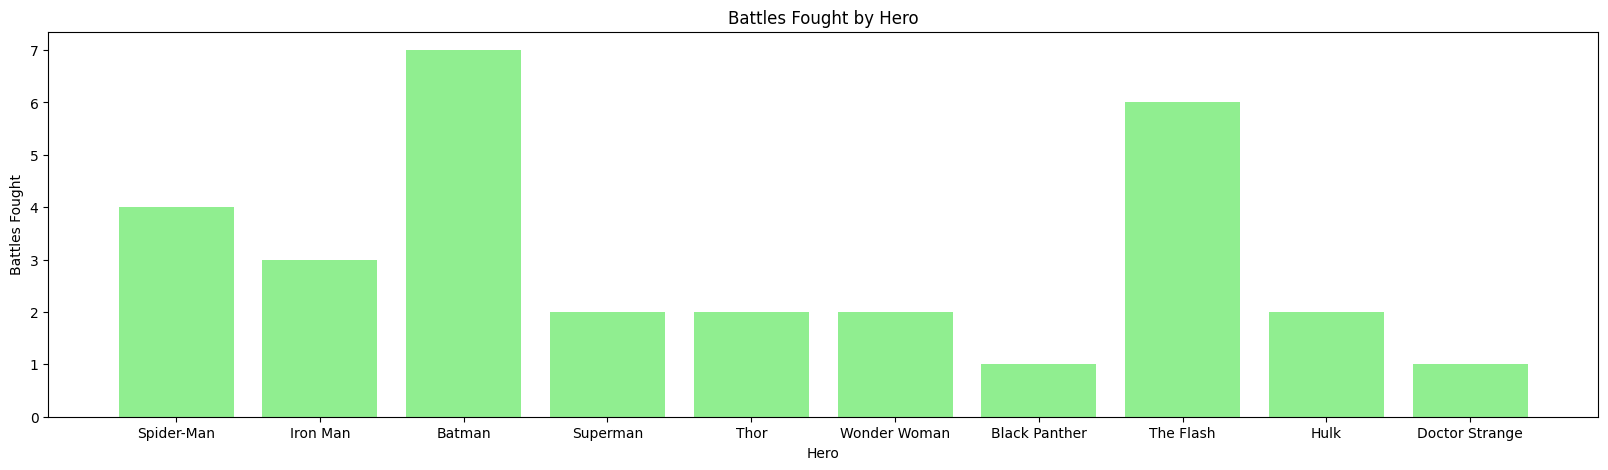

In [75]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.bar(df['name'], df['Fought_Count'], color='lightgreen')
plt.xlabel('Hero')
plt.ylabel('Battles Fought')
plt.title('Battles Fought by Hero')
plt.show()

In [91]:
name = input('''What hero would you like to know about?
If you need the list of heroes, write "help"

Name: ''')
# this is to provide the list of heroes, if needed
if name == "help":
  cursor.execute('''
  SELECT name FROM heroes
  ''')
  heroes = cursor.fetchall()
  print("\nHere is the list of heroes:")
  for hero in heroes:
    print(hero[0])
else:
  # Make sure the hero input is in the list
  cursor.execute('''
  SELECT name, power, team FROM heroes
  WHERE name = ?
  ''', (name,))
  hero = cursor.fetchone()
  if hero is not None:
    # Output Hero data
    print(f"Superpower: {hero[1]}")
    print(f"Team: {hero[2]}")
    # Output Sidekicks
    cursor.execute('''
    SELECT sidekicks.sidekick_name FROM sidekicks
    JOIN heroes ON sidekicks.hero_id = heroes.id
    WHERE heroes.name = ?
    ''', (name,))
    sidekicks = cursor.fetchall()
    print("Sidekick(s): ", end="")
    if len(sidekicks) == 0:
      print("None")
    else:
      for sidekick in sidekicks[:-1]:
        print(f"{sidekick[0]}" + ", ", end = "")
      print(f"{sidekicks[-1][0]}")
    # Output villains fought against
    cursor.execute('''
    SELECT villains.name, outcome FROM battles
    JOIN heroes ON battles.hero_id = heroes.id
    JOIN villains ON battles.villain_id = villains.id
    WHERE heroes.name = ?
    ''', (name,))
    battles = cursor.fetchall()
    print("Battles fought:")
    # As well as the outcome
    for battle in battles:
      print(f"\t VS {battle[0]} - ", end ="")
      battle_outcome = battle[1]
      if battle_outcome == "Hero Wins":
        print("Won")
      elif battle_outcome == "Villain Wins":
        print("Lost")
      else:
        print("Draw")
  else:
    print("Hero not found.")


What hero would you like to know about?
If you need the list of heroes, write "help"

Name: The Flash
Superpower: Super Speed
Team: Justice League
Sidekick(s): Impulse, Jay Garrick, Kid Flash
Battles fought:
	 VS Green Goblin - Draw
	 VS Green Goblin - Draw
	 VS Green Goblin - Draw
	 VS Joker - Draw
	 VS Magneto - Won
	 VS Magneto - Lost


## Submission Guidelines

Each group must submit a **Google Colab Notebook (.ipynb)** containing:
- ✅ **Database schema (DDL)**
- ✅ **CSV imports & data insertion (DML)**
- ✅ **SQL queries & results**
- ✅ **Custom feature (bonus if applicable)**

## Grading Criteria (Total: 25 Points)

| Section                 | Points |
|-------------------------|--------|
| Database Setup          | 5      |
| Data Importing         | 10     |
| Querying the Data      | 10     |
| Extra Feature          | 5      |
| Bonus Challenge (Optional) | +5  |

### Final Notes:
- Be **creative** when designing superheroes and villains.
- **Comment your code** to explain its functionality.
- **Have fun** building your superhero universe!